# Задача 3

In [1]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

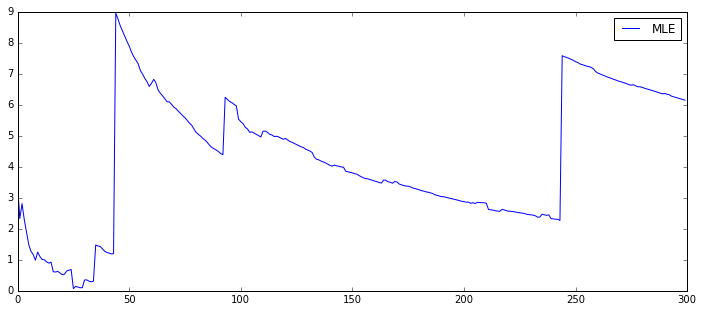

In [3]:
sz = 300
theta0 = 0
x = cauchy.rvs(size=sz)
means = np.array([x[:(i+1)].mean() for i in range(sz)])

figure(figsize=(12,5))
plot(abs(theta0-means), label='MLE')
legend()
show()

In [4]:
def BayesEst(x, a, sigma):
    return (sum(x) + (a/sigma**2))/(len(x) + (1./(sigma**2)))

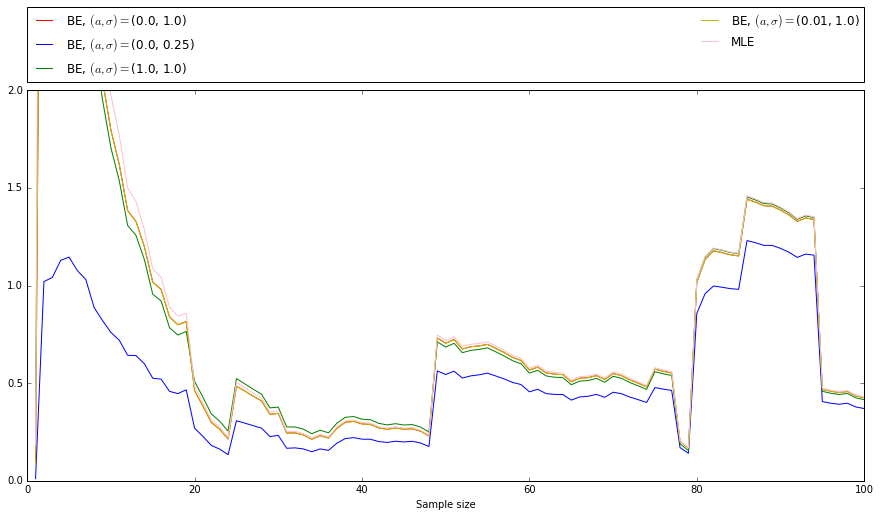

In [5]:
sz = 100
theta0 = 0
x = cauchy.rvs(size=sz)
means = np.array([x[:(i+1)].mean() for i in range(sz)])

colors = ['r','b','g','y','pink','r','g']
params = np.array([(0,1), (0,1/4), (1,1), (0.01,1)])

plt.figure(figsize=(15,7))
col = 0
for par in params:
    tmp = np.array([BayesEst(x[:(i+1)],par[0],par[1]) for i in range(sz)])
    plt.xlabel('Sample size')
    # BE stands for 'Bayes estimator'
    plt.plot(np.arange(1,sz+1), abs(tmp), color=colors[col], \
             label='BE, $(a, \sigma)=$({}, {})'.format(par[0], par[1]))
    col += 1

plt.plot(np.arange(1,sz+1), abs(means), color=colors[col], label='MLE')
plt.ylim((0,2))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, \
           mode="expand", borderaxespad=0.)
    
plt.show()